In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time as time

In [2]:
BDS = pd.read_csv('C:\\Users\\Nimisha Jain\\Downloads\\datasets_8538_11952_Train.csv')
BDS_test = pd.read_csv('C:\\Users\\Nimisha Jain\\Downloads\\datasets_8538_11952_Test.csv')

In [3]:
BDS.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
BDS_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
BDS.shape

(8523, 12)

In [6]:
BDS_test.shape

(5681, 11)

In [7]:
BDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [8]:
BDS_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
BDS.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
BDS_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
BDS_Final = pd.concat([BDS,BDS_test],ignore_index=True)

In [12]:
BDS_Final.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

Skewness 1.1775306028542798


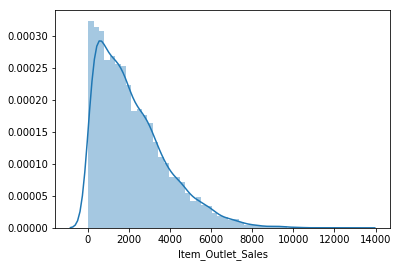

In [13]:
sns.distplot(BDS['Item_Outlet_Sales'])
print('Skewness',BDS['Item_Outlet_Sales'].skew())

In [14]:
BDS['Item_Outlet_Sales']=np.sqrt(BDS['Item_Outlet_Sales'])

Skewness 0.23467599347099255


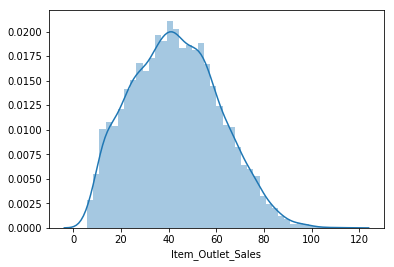

In [15]:
sns.distplot(BDS['Item_Outlet_Sales'])
print('Skewness',BDS['Item_Outlet_Sales'].skew())

In [16]:
BDS_Final['Item_Outlet_Sales'] = BDS_Final['Item_Outlet_Sales'].fillna(BDS_Final['Item_Outlet_Sales'].median())

In [17]:
BDS_Final['Item_Outlet_Sales'] = np.sqrt(BDS_Final['Item_Outlet_Sales'])

In [18]:
BDS_Final.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,61.115775,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,21.057607,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,45.795961,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,27.062520,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,31.538947,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [19]:
BDS_Final['Item_Weight']= BDS_Final['Item_Weight'].fillna(BDS_Final['Item_Weight'].median())

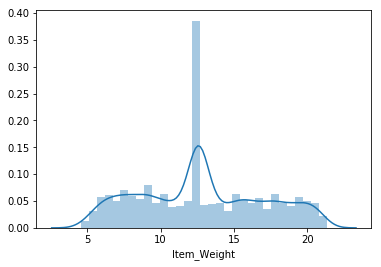

In [20]:
sns.distplot(BDS_Final['Item_Weight'])

In [21]:
BDS_Final['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [22]:
BDS_Final['Outlet_Size'].fillna(BDS_Final['Outlet_Size'].mode()[0],inplace=True)

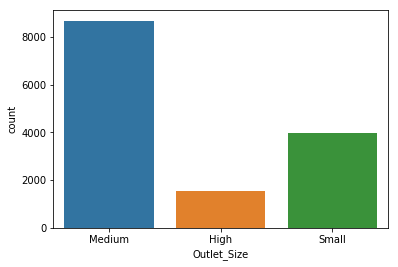

In [23]:
sns.countplot(BDS_Final['Outlet_Size'])

In [24]:
BDS_Final = BDS_Final.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'])

In [25]:
BDS_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 9 columns):
Item_Fat_Content        14204 non-null object
Item_MRP                14204 non-null float64
Item_Outlet_Sales       14204 non-null float64
Item_Type               14204 non-null object
Item_Visibility         14204 non-null float64
Item_Weight             14204 non-null float64
Outlet_Location_Type    14204 non-null object
Outlet_Size             14204 non-null object
Outlet_Type             14204 non-null object
dtypes: float64(4), object(5)
memory usage: 998.8+ KB


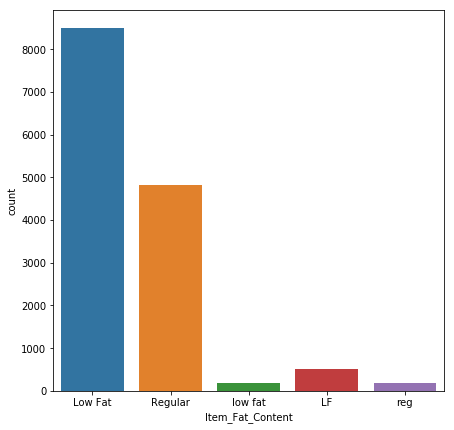

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(BDS_Final['Item_Fat_Content'])

In [27]:
BDS_Final['Item_Fat_Content'] = BDS_Final['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF':'Low Fat','reg':'Regular'})

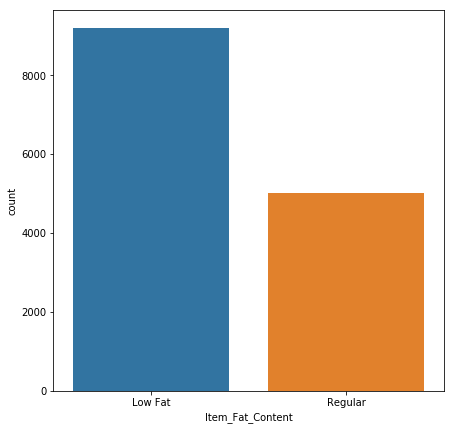

In [28]:
plt.figure(figsize=(7,7))
sns.countplot(BDS_Final['Item_Fat_Content'])

In [29]:
BDS_Final.head(10)

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,249.8092,61.115775,Dairy,0.016047,9.300,Tier 1,Medium,Supermarket Type1
1,Regular,48.2692,21.057607,Soft Drinks,0.019278,5.920,Tier 3,Medium,Supermarket Type2
2,Low Fat,141.6180,45.795961,Meat,0.016760,17.500,Tier 1,Medium,Supermarket Type1
3,Regular,182.0950,27.062520,Fruits and Vegetables,0.000000,19.200,Tier 3,Medium,Grocery Store
4,Low Fat,53.8614,31.538947,Household,0.000000,8.930,Tier 3,High,Supermarket Type1
5,Regular,51.4008,23.592558,Baking Goods,0.000000,10.395,Tier 3,Medium,Supermarket Type2
6,Regular,57.6588,18.535177,Snack Foods,0.012741,13.650,Tier 3,High,Supermarket Type1
7,Low Fat,107.7622,63.425260,Snack Foods,0.127470,12.600,Tier 3,Medium,Supermarket Type3
8,Regular,96.9726,32.811562,Frozen Foods,0.016687,16.200,Tier 2,Medium,Supermarket Type1
9,Regular,187.8214,68.633337,Frozen Foods,0.094450,19.200,Tier 2,Medium,Supermarket Type1


In [30]:
obj=[]
num = []
for col in BDS_Final.columns:
    if BDS_Final[col].dtypes == 'O':
        obj.append(col)
    else:
        num.append(col)
        
BDS_num = BDS_Final[num]
BDS_obj = BDS_Final[obj]

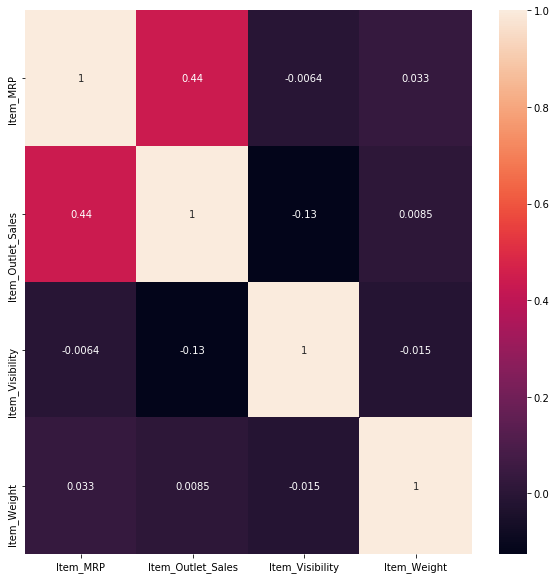

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(BDS_num.corr(),annot=True)

In [32]:
BDS_Final = pd.get_dummies(BDS_Final,columns=obj)

In [33]:
BDS_Final.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,61.115775,0.016047,9.30,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,48.2692,21.057607,0.019278,5.92,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,141.6180,45.795961,0.016760,17.50,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,182.0950,27.062520,0.000000,19.20,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,53.8614,31.538947,0.000000,8.93,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
#from sklearn.preprocessing import PolynomialFeatures
#ploy = PolynomialFeatures(4)
X = BDS_Final.drop('Item_Outlet_Sales',axis=1)
y = BDS_Final['Item_Outlet_Sales']
#ploy.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [36]:
scaler = StandardScaler()
lr = LinearRegression(normalize=True)
svr = SVR()
#knr = KNeighborsRegressor()
dt = DecisionTreeRegressor(criterion='mse',max_depth=3)
rf = RandomForestRegressor(n_estimators=10,max_depth=5)
gbr = GradientBoostingRegressor()
#pipeline_lr = make_pipeline(scaler,lr)
#pipeline_svr = make_pipeline(scaler,svr)
#pipeline_knr = make_pipeline(scaler,knr)
#pipeline_dt = make_pipeline(scaler,dt)
#pipeline_rf = make_pipeline(scaler,rf)

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn import metrics
def score_reg(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [38]:
lr.fit(X_train,y_train)
score_reg(lr, X_test, y_test)
#pipeline_lr.fit(X_train,y_train)
#pred = pipeline_lr.predict(X_test)
#print(pipeline_lr.score(X_train,y_train))
#print(pipeline_lr.score(X_test,y_test))

Mean Absolute Error: 8.720726950164247
Mean Squared Error: 120.6732254877226
Root Mean Squared Error: 10.98513657119121
Root Mean Squared Log Error 0.29110831500545814


In [39]:
svr.fit(X_train,y_train)
score_reg(svr, X_test, y_test)
#pipeline_svr.fit(X_train,y_train)
#pred = pipeline_svr.predict(X_test)
#print(pipeline_svr.score(X_train,y_train))
#print(pipeline_svr.score(X_test,y_test))

Mean Absolute Error: 8.841217357765576
Mean Squared Error: 176.68141140889438
Root Mean Squared Error: 13.292156010553532
Root Mean Squared Log Error 0.3594492705681233


In [40]:
dt.fit(X_train,y_train)
score_reg(dt, X_test, y_test)
#pipeline_dt.fit(X_train,y_train)
#pred = pipeline_dt.predict(X_test)
#print(pipeline_dt.score(X_train,y_train))
#print(pipeline_dt.score(X_test,y_test))

Mean Absolute Error: 8.882824997572474
Mean Squared Error: 126.05672166151751
Root Mean Squared Error: 11.227498459653313
Root Mean Squared Log Error 0.2979603312695424


In [41]:
rf.fit(X_train,y_train)
score_reg(rf, X_test, y_test)
#pipeline_rf.fit(X_train,y_train)
#pred = pipeline_rf.predict(X_test)
#print(pipeline_rf.score(X_train,y_train))
#print(pipeline_rf.score(X_test,y_test))

Mean Absolute Error: 8.77180340443543
Mean Squared Error: 119.14408538556589
Root Mean Squared Error: 10.915314259588035
Root Mean Squared Log Error 0.2917280600312768


In [42]:
gbr.fit(X_train,y_train)
score_reg(gbr,X_test, y_test)

Mean Absolute Error: 8.770666775259333
Mean Squared Error: 119.47060315920054
Root Mean Squared Error: 10.93026089163477
Root Mean Squared Log Error 0.2935169674497526


In [44]:
#from sklearn.model_selection import GridSearchCV
#params = ({'n_estimators':[20,30,40],'criterion':['mse','mae'],'max_depth':[2,3,4,5]})
#grid_search = GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1)

#grid_search.fit(X_train,y_train)
#grid_search.predict(X_test, y_test)

#print("Best parameter of the model :",grid_search.best_params_)

KeyboardInterrupt: 

In [45]:
test = BDS_test
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [46]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [47]:
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].median())
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF':'Low Fat','reg':'Regular'})

In [48]:
test = test.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'])
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,8.300,Regular,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1
4,12.500,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3


In [49]:
test = pd.get_dummies(test,columns=obj)

In [50]:
test_pred = rf.predict(test)

In [53]:
pred = pd.DataFrame(test_pred)

sub = pd.read_csv('C:\\Users\\Nimisha Jain\\Downloads\\datasets_8538_11952_Submission.csv')

sub['Item_Outlet_Sales'] = pred
sub.to_csv('C:\\Users\\Nimisha Jain\\Downloads\\Submission_pred.csv', index=False)